In [1]:
import pennylane as qml
from pennylane import numpy as np
from matplotlib import pyplot as plt
import time
from supplementary_code import *

from data import *
from matplotlib import pyplot as plt
import numpy as np

In [2]:
nq = 10
depth = int(nq/2)
dev = qml.device("default.qubit", wires= nq) 

# Qauntum Quenches and XXZ Model

Authors (Alphabetical Order)
\
Author1: Yilian Liu, Email:bliu0530@gmail.com, Github:yilian49\
Author2: Arunava Majumder, Email:arunavaangshuman@gmail.com, Github:ArunM69\
Author3: Mudassir Moosa, Email:mudassir.moosa20@gmail.com, Github:mudassirmoosa

### Abstract

How information flows in a many-body system is a problem of physical interest. One way to model the information flow is to perturb the many-body system and study the time evolution of the physical observables. This problem of "quantum quenches" has been studied in many papers. In this project, we study this problem using a quantum simulator. We focus on the XXZ model and investigate the time evolution of a two-point function following a quantum quench. We consider two protocols of quantum quench. In the first protocol, we perturb the ground state of the XXZ model in the gapless phase. In the second protocol, we deform the Hamiltonian of the XXZ model by changing the value of the parameter $\Delta$.

### Theory

In this project, we try to observe the behaviour of Hamiltonian Variational Ansatz (HVA) corresponding to the $XXZ$ quantum many-body Hamiltonian that can be found in ref.[1]. For the 1-D $XXZ$ model, the Hamiltonian is given by
\begin{equation}
    H_{XXZ}= \sum_{i=1}^{N}\left(\sigma^{x}_{i}\sigma^{x}_{i+1} + \sigma^{z}_{i}\sigma^{z}_{i+1} + \Delta\sigma^{z}_{i}\sigma^{z}_{i+1}\right).
\end{equation}

In this notebook, we demonstrate the quantum quench process for $\Delta=0.1$ with the state perturbation. We have computed other setups with different $\Delta$ values and/or perturbations types and stored the results in data.py.

In [13]:
Delta = 0.1
H = H_XXZ(Delta,wires=range(nq))

print(H)

  (0.1) [Z0 Z1]
+ (0.1) [Z1 Z2]
+ (0.1) [Z2 Z3]
+ (0.1) [Z3 Z4]
+ (0.1) [Z4 Z5]
+ (0.1) [Z5 Z6]
+ (0.1) [Z6 Z7]
+ (0.1) [Z7 Z8]
+ (0.1) [Z8 Z9]
+ (0.1) [Z9 Z0]
+ (1) [X0 X1]
+ (1) [Y0 Y1]
+ (1) [X1 X2]
+ (1) [Y1 Y2]
+ (1) [X2 X3]
+ (1) [Y2 Y3]
+ (1) [X3 X4]
+ (1) [Y3 Y4]
+ (1) [X4 X5]
+ (1) [Y4 Y5]
+ (1) [X5 X6]
+ (1) [Y5 Y6]
+ (1) [X6 X7]
+ (1) [Y6 Y7]
+ (1) [X7 X8]
+ (1) [Y7 Y8]
+ (1) [X8 X9]
+ (1) [Y8 Y9]
+ (1) [X9 X0]
+ (1) [Y9 Y0]


### Ansatz and Energy Minimization

Here, we assume periodic boundary conditions. The parameter $\Delta$ controls the spin anisotropy in the
model. The ansatz design with one layer is given by ref.[1] with four parameters in each layer:
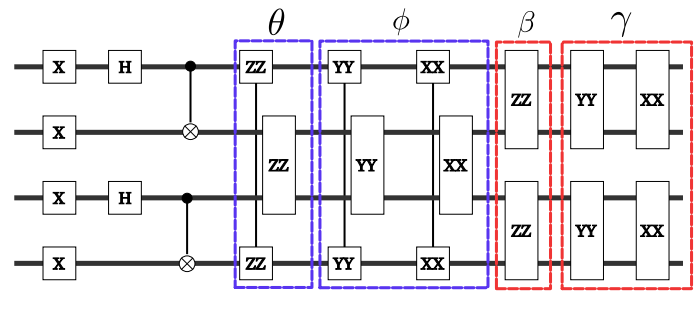

In [31]:
# The complete ansatz code is included in the supplementary_code file
@qml.qnode(dev)
def circuit(params, Delta, depth=depth, nq=nq):
    
    HVA_ansatz(params, Delta, depth, range(nq))
    
    return qml.expval(H)

Motivated from the reported results from ref.[1], we set all our initial parameters to $\pi$.

In [28]:
params = np.array([np.pi for _ in range(4*depth)])

Here we define a cost function that computes the expectation value of the ansatz. Minimizing the expectation value gives approximated ground state corresponding to our Hamiltonian.

In [16]:
cost_fn = lambda w: circuit(w, Delta=Delta, depth=depth, nq=nq)

In [17]:
start_time = time.time()    

steps = 200

optimizer = qml.AdamOptimizer(stepsize=0.5)
best_cost = cost_fn(params)
best_params = params

for j in range(steps+1):
    params2 = params
    params, cost = optimizer.step_and_cost(cost_fn, params)

    if cost < best_cost:
        best_params = params2
        best_cost = cost
        
    if j!=0 and j % 10 == 0:
        print(f"Cost at Step {j}: {cost}")

end_time = time.time()
print('Time taken: ', (end_time-start_time)/60, ' mins.')

Cost at Step 2: -8.8247603650992
Cost at Step 4: -10.52293804886149
Cost at Step 6: -10.727490883213939
Cost at Step 8: -12.465938707410205
Cost at Step 10: -12.94914230298731
Cost at Step 12: -12.621832994523501
Cost at Step 14: -12.673940239237655
Cost at Step 16: -12.699476919321874
Cost at Step 18: -12.903981191849608
Cost at Step 20: -12.94590633217203
Cost at Step 22: -12.972168253326963
Cost at Step 24: -13.188617775773622
Cost at Step 26: -13.158631398924655
Cost at Step 28: -13.154128509337406
Cost at Step 30: -13.246342626028685
Cost at Step 32: -13.300874147779773
Cost at Step 34: -13.258735690557671
Cost at Step 36: -13.270660120652751
Cost at Step 38: -13.308589330690973
Cost at Step 40: -13.322013220119311
Cost at Step 42: -13.323365402141649
Cost at Step 44: -13.336263666052584
Cost at Step 46: -13.340005617092894
Cost at Step 48: -13.349429424984656
Cost at Step 50: -13.354373261575379
Cost at Step 52: -13.357759171492807
Cost at Step 54: -13.355017161599008
Cost at Ste

In [18]:
print(best_cost)

-13.369788466166405


In [21]:
for i in range(1,10):
    
    corr = corr_function(i, best_params,0.5,depth,nq)
    
    print(i,np.abs(corr))

1 0.46586153005624686
2 0.10902237418902794
3 0.00782143675498534
4 0.008685089010033481
5 0.02995755384366966
6 0.008685089010033759
7 0.16279520948242585
8 0.10902237418902763
9 0.2084476807019935


### Perturbations

In the above analysis, we have optimized the optimized the energy expectation value and have determined the ground state of the XXZ model. Now we perturb the ground state $|\psi_{0}\rangle$ by acting on the state: 

$$ |\psi_{0}\rangle \, \rightarrow |\psi_{1}\rangle \, = \, \hat{V} \ket{\psi_{0}} \, .$$

For simplicity, we take $V = H^{\otimes n}$, where $H$ is the Hadamard gate.

The perturbed state is no longer the eigenstate of the Hamiltonian and hence will have a non-trivial time evolution. We perform this time evolution using the method of Trotterization. We perform $400$ steps with $dt = 1/400$. After each step, we calculate the following correlation function:

$$ C(i) \, = \, \langle Z(0) \, Z(i) \rangle \, ,$$
where $Z(i)$ is Pauli $Z$ acting on ith qubit.

The result of time evoltuion of $C(i)$ for $i=3$ is presented below.

In [22]:
# Time evolution

corr_t = []
t = []
i =  3
dt = 1/400

start_time = time.time()    
for step in range(401):
    
    t.append(dt*step)
    
    corr_dt = corr_function(i, best_params, Delta, depth, nq, perturbation='state',timesteps=step)
    
    print(step,corr_dt)
    corr_t.append(corr_dt)
    
end_time = time.time()
print('Time taken: ', (end_time-start_time)/60, ' mins.')

0 -0.3621391918832901
1 -0.36207848417134136
2 -0.36197893288755
3 -0.36184055484343025
4 -0.3616633750625641
5 -0.3614474267750045
6 -0.36119275140963913
7 -0.3608993985845266
8 -0.3605674260951958
9 -0.36019689990092324
10 -0.3597878941089797
11 -0.3593404909568665
12 -0.3588547807925244
13 -0.3583308620525447
14 -0.35776884123836733
15 -0.35716883289048895
16 -0.35653095956067166
17 -0.3558553517821779
18 -0.35514214803802335
19 -0.3543914947272664
20 -0.35360354612934014
21 -0.3527784643664351
22 -0.35191641936394613
23 -0.3510175888089909
24 -0.3500821581070116
25 -0.34911032033647765
26 -0.3481022762016903
27 -0.34705823398371116
28 -0.3459784094894268
29 -0.3448630259987562
30 -0.3437123142100263
31 -0.3425265121835197
32 -0.3413058652832195
33 -0.34005062611675496
34 -0.33876105447358135
35 -0.33743741726139076
36 -0.33607998844078807
37 -0.33468904895824053
38 -0.3332648866773201
39 -0.33180779630825946
40 -0.3303180793358397
41 -0.328796043945629
42 -0.32724200494859207
43 -0

336 -0.059152483986434634
337 -0.06046556697395056
338 -0.06177343724358145
339 -0.06307578161414251
340 -0.06437229014122134
341 -0.06566265618245054
342 -0.06694657646157473
343 -0.06822375113130327
344 -0.06949388383492858
345 -0.07075668176670552
346 -0.0720118557309703
347 -0.07325912019999276
348 -0.07449819337054744
349 -0.07572879721919151
350 -0.07695065755624142
351 -0.0781635040784342
352 -0.07936707042026384
353 -0.080561094203987
354 -0.08174531708828175
355 -0.08291948481555647
356 -0.08408334725789718
357 -0.08523665846164594
358 -0.0863791766906033
359 -0.08751066446784736
360 -0.08863088861616186
361 -0.08973962029706686
362 -0.09083663504844927
363 -0.09192171282078279
364 -0.092994638011936
365 -0.09405519950056296
366 -0.09510319067807188
367 -0.09613840947916735
368 -0.09716065841096677
369 -0.09816974458068131
370 -0.09916547972186635
371 -0.10014768021923479
372 -0.10111616713203353
373 -0.10207076621597971
374 -0.10301130794376223
375 -0.10393762752410016
376 -0

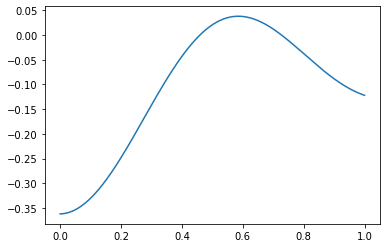

In [24]:
plt.plot(np.linspace(0,1,401),np.real(corr_t))

### Results

In [29]:
state_perts = [state1,state3,state5,state7,state9,state10]
labels = ['D=0.1','D=0.3','D=0.5','D=0.7','D=0.9','D=1.0']

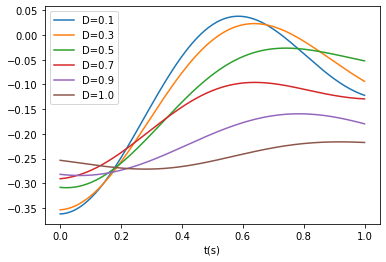

In [30]:
fig = plt.figure()
x = np.linspace(0,1,401) # Grid points

for i in range(len(state_perts)):
    plt.plot(x,state_perts[i], label= labels[i])
plt.xlabel('t(s)')
plt.legend()

In [3]:
ham_perts = [ham10,ham13,ham15,ham17,ham19,ham20]
ham_labels = ['D=1.0','D=1.3','D=1.5','D=1.7','D=1.9','D=2.0']

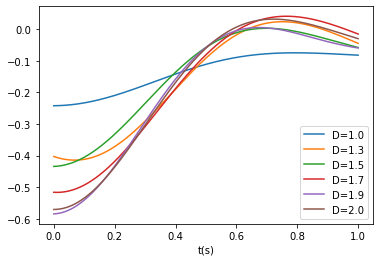

In [5]:
fig = plt.figure()
x = np.linspace(0,1,401) # Grid points

# Inverse of the second derivative matrix multiplied by the step function should give the analytical solution for the poisson equation
for i in range(len(ham_perts)):
    plt.plot(x,ham_perts[i], label= ham_labels[i])
plt.xlabel('t(s)')
plt.legend()

[1] R. Wiersema, C. Zhou, Y. de Sereville, J. F. Carrasquilla,
Y. B. Kim, and H. Yuen, Exploring entanglement and op-
timization within the hamiltonian variational ansatz, PRX
Quantum 1, 020319 (2020)